In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [2]:
# Import the datasets
calamansi_df = pd.read_csv('calamansi_data.csv')
lime_df = pd.read_csv('lime_data.csv')
sour_orange_df = pd.read_csv('sour_orange_data.csv')

In [3]:
import pandas as pd

# Add a new column "Citrus Type" with the corresponding citrus type
calamansi_df["Citrus Type"] = "Calamansi"
lime_df["Citrus Type"] = "Lime"
sour_orange_df["Citrus Type"] = "Sour Orange"

# Concatenate the dataframes vertically
merged_df = pd.concat([calamansi_df, lime_df, sour_orange_df], ignore_index=True)

# Display the merged dataframe
print(merged_df)

    Length of leaves (cm)  Width of leaves (cm)  Area of leaves (cm²)  \
0                     4.0                   2.6                 10.40   
1                     4.9                   3.3                 16.17   
2                     4.2                   2.8                 11.76   
3                     4.5                   3.0                 13.50   
4                     4.7                   3.1                 14.77   
..                    ...                   ...                   ...   
82                    5.9                   3.8                 22.42   
83                    6.8                   3.6                 24.48   
84                    6.7                   3.5                 23.45   
85                    5.7                   3.1                 17.67   
86                    6.5                   3.6                 23.40   

    Average Red of leaves  Average Green of leaves  Average Blue of leaves  \
0                     118                    

In [4]:
# Shuffle the rows randomly
shuffled_df = merged_df.sample(frac=1).reset_index(drop=True)

# Display the shuffled dataframe
print(shuffled_df)

    Length of leaves (cm)  Width of leaves (cm)  Area of leaves (cm²)  \
0                     6.4                   3.7                 23.68   
1                     6.0                   3.3                 19.80   
2                     5.8                   3.3                 19.14   
3                     4.9                   3.3                 16.17   
4                     4.6                   3.2                 15.36   
..                    ...                   ...                   ...   
82                    6.1                   3.8                 23.18   
83                    4.4                   3.0                 13.20   
84                    5.0                   3.1                 15.50   
85                    6.4                   3.6                 23.04   
86                    5.7                   3.3                 18.81   

    Average Red of leaves  Average Green of leaves  Average Blue of leaves  \
0                     133                    

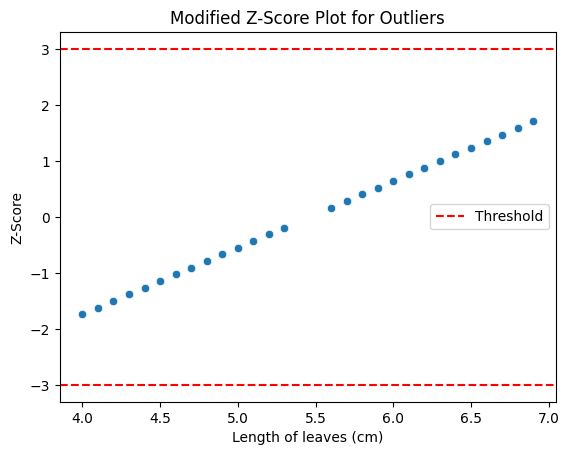

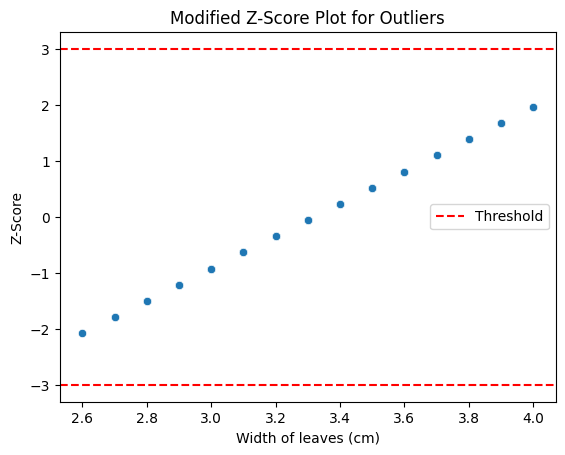

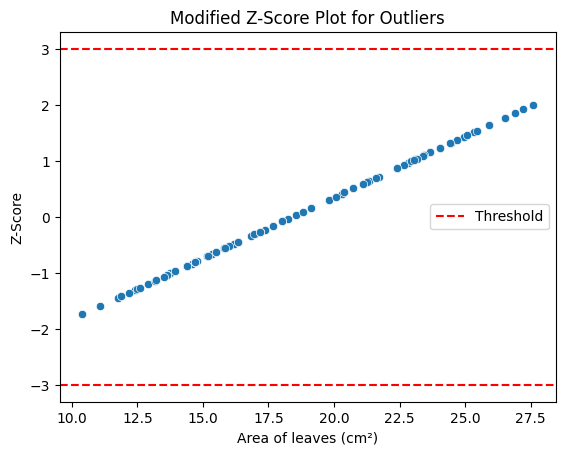

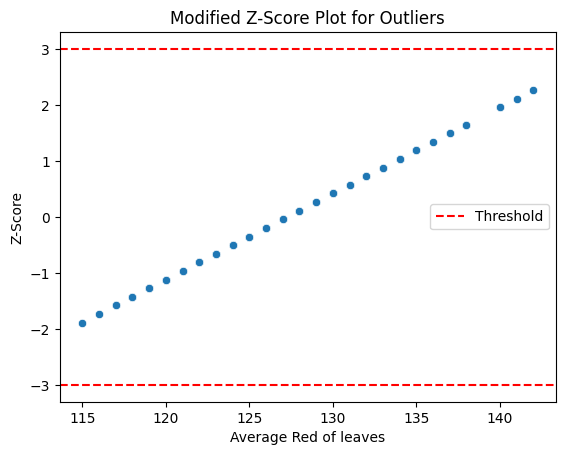

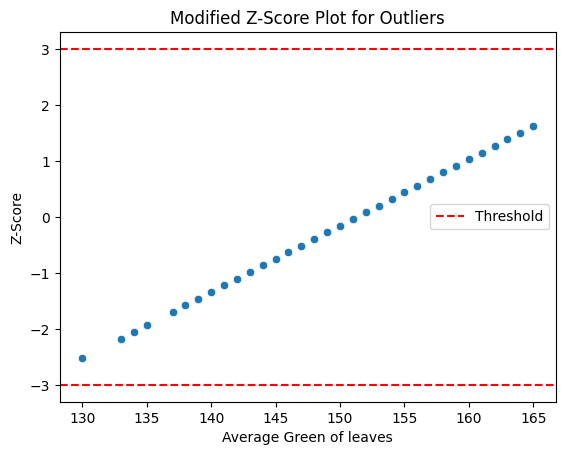

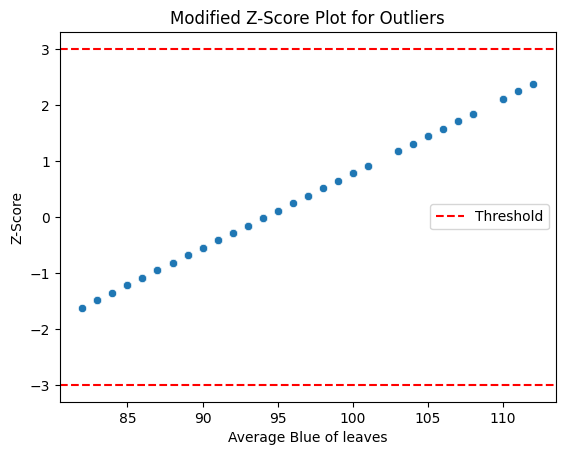

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

numerical_cols = shuffled_df.select_dtypes(include=['int64', 'float64']).columns
# data = pd.DataFrame()  # Initialize an empty DataFrame
data = shuffled_df.copy()

for feature in numerical_cols:
    data[feature + '_z_score'] = zscore(shuffled_df[feature])
    sns.scatterplot(x=feature, y=feature + '_z_score', data=data)
    plt.axhline(y=3, color='r', linestyle='--', label='Threshold')
    plt.axhline(y=-3, color='r', linestyle='--')
    plt.xlabel(feature)
    plt.ylabel('Z-Score')
    plt.title('Modified Z-Score Plot for Outliers')
    plt.legend()
    plt.show()

In [6]:
import pandas as pd

def one_hot_encode_feature(df, column_name):
    # Create binary vectors for each unique value
    unique_values = {'(0,255,0)':'Green', '(255,255,0)':'Yellow', '(255,0,0)':'Red', '(255,165,0)':'Squash'}
    for key, value in unique_values.items():
        df[f'Fruit Color {value}'] = (df[column_name] == key).astype(int)

    # Drop the original column
    df.drop(columns=[column_name], inplace=True)

    return df

# One-hot encode the 'Fruit Color (RGB)' column
shuffled_df = one_hot_encode_feature(shuffled_df, 'Fruit Color (RGB)')

In [7]:
# Display the shuffled dataframe
print(shuffled_df)

    Length of leaves (cm)  Width of leaves (cm)  Area of leaves (cm²)  \
0                     6.4                   3.7                 23.68   
1                     6.0                   3.3                 19.80   
2                     5.8                   3.3                 19.14   
3                     4.9                   3.3                 16.17   
4                     4.6                   3.2                 15.36   
..                    ...                   ...                   ...   
82                    6.1                   3.8                 23.18   
83                    4.4                   3.0                 13.20   
84                    5.0                   3.1                 15.50   
85                    6.4                   3.6                 23.04   
86                    5.7                   3.3                 18.81   

    Average Red of leaves  Average Green of leaves  Average Blue of leaves  \
0                     133                    

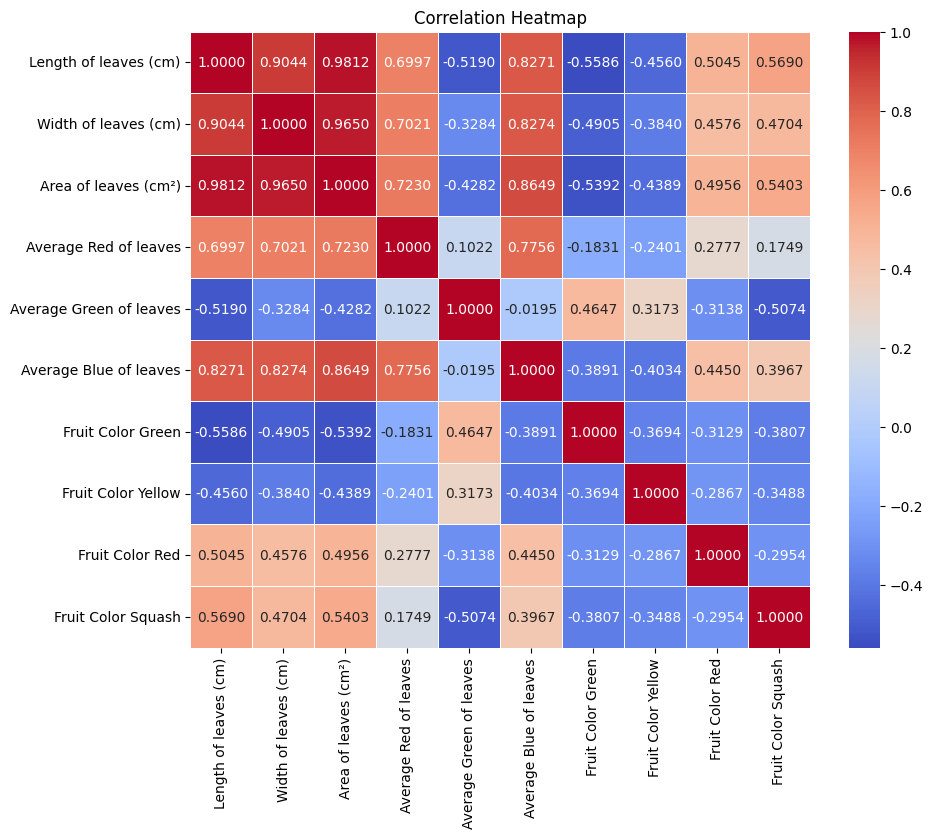

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
correlation_matrix = shuffled_df.drop(columns=["Citrus Type"]).corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".4f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

In [9]:
import pandas as pd

# Get a copy of existing columns
columns_existing = list(correlation_matrix.columns)

# Get the columns to drop
columns_to_drop = []

# Identify attributes with high correlation (threshold of 0.7)
threshold = 0.7

for col1 in columns_existing:
    for col2 in columns_existing:
        if col1 != col2 and (correlation_matrix[col1][col2] > threshold or correlation_matrix[col1][col2] < -threshold):
            columns_to_drop.append(col2)
            columns_existing.remove(col2)

# Drop the columns
filtered_df = shuffled_df.drop(columns=columns_to_drop)

# Display the updated dataframe
print(filtered_df)

    Area of leaves (cm²)  Average Green of leaves  Citrus Type  \
0                  23.68                      148  Sour Orange   
1                  19.80                      139  Sour Orange   
2                  19.14                      135  Sour Orange   
3                  16.17                      157    Calamansi   
4                  15.36                      159    Calamansi   
..                   ...                      ...          ...   
82                 23.18                      141  Sour Orange   
83                 13.20                      164    Calamansi   
84                 15.50                      152         Lime   
85                 23.04                      146  Sour Orange   
86                 18.81                      135  Sour Orange   

    Fruit Color Green  Fruit Color Yellow  Fruit Color Red  Fruit Color Squash  
0                   0                   0                0                   1  
1                   0                   0    

In [10]:
X = filtered_df.drop('Citrus Type', axis=1)
y = filtered_df['Citrus Type']

In [11]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define models to compare
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC()
}

# Create a list to store results
results = []

# Evaluate each model
for model_name, model in models.items():
  # Train the model
  model.fit(X_train, y_train)

  # Make predictions on test set
  y_pred = model.predict(X_test)

  # Calculate evaluation metrics with micro-averaging
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, average='micro')
  recall = recall_score(y_test, y_pred, average='micro')
  f1 = f1_score(y_test, y_pred, average='micro')

  # Append results to list as a dictionary
  results.append({
      'Model': model_name,
      'Accuracy': accuracy,
      'Precision': precision,
      'Recall': recall,
      'F1-Score': f1
  })

# Create a Pandas DataFrame from the results list
accuracy_values = pd.DataFrame(results)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [13]:
# Print the Accuracies (table)
print(accuracy_values.head())

                    Model  Accuracy  Precision    Recall  F1-Score
0     Logistic Regression  1.000000   1.000000  1.000000  1.000000
1           Random Forest  1.000000   1.000000  1.000000  1.000000
2  Support Vector Machine  0.388889   0.388889  0.388889  0.388889


In [14]:
# Get the best model
best_model = models[accuracy_values.sort_values(by=['Accuracy'], ascending=False).iloc[0]['Model']]

# Make predictions on test set
y_pred = best_model.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='micro')
recall = recall_score(y_test, y_pred, average='micro')
f1 = f1_score(y_test, y_pred, average='micro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


In [16]:
print(y_pred)

['Sour Orange' 'Sour Orange' 'Sour Orange' 'Lime' 'Sour Orange'
 'Calamansi' 'Sour Orange' 'Sour Orange' 'Calamansi' 'Calamansi' 'Lime'
 'Lime' 'Lime' 'Lime' 'Calamansi' 'Sour Orange' 'Lime' 'Calamansi']


In [17]:
print(y_test)

76    Sour Orange
0     Sour Orange
26    Sour Orange
22           Lime
12    Sour Orange
67      Calamansi
10    Sour Orange
18    Sour Orange
4       Calamansi
68      Calamansi
84           Lime
65           Lime
53           Lime
80           Lime
83      Calamansi
64    Sour Orange
33           Lime
79      Calamansi
Name: Citrus Type, dtype: object


In [18]:
# Make predictions on test set
final_pred = best_model.predict(X)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy_final = accuracy_score(y, final_pred)
precision_final = precision_score(y, final_pred, average='micro')
recall_final = recall_score(y, final_pred, average='micro')
f1_final = f1_score(y, final_pred, average='micro')

print("Accuracy:", accuracy_final)
print("Precision:", precision_final)
print("Recall:", recall_final)
print("F1-score:", f1_final)

Accuracy: 0.9885057471264368
Precision: 0.9885057471264368
Recall: 0.9885057471264368
F1-score: 0.9885057471264368
